# Tratamento do datasets

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

sns.set_style('darkgrid')

%matplotlib inline

In [3]:
db_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
db_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
db_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
db_deaths_country = db_deaths.groupby(['Country/Region']).sum()
db_confirmed_country = db_confirmed.groupby(['Country/Region']).sum()
db_recovered_country = db_recovered.groupby(['Country/Region']).sum()

In [5]:
db_deaths_country.drop(['Lat','Long'],axis=1,inplace=True)
db_confirmed_country.drop(['Lat','Long'],axis=1,inplace=True)
db_recovered_country.drop(['Lat','Long'],axis=1,inplace=True)

# Gráficos

## Confirmados

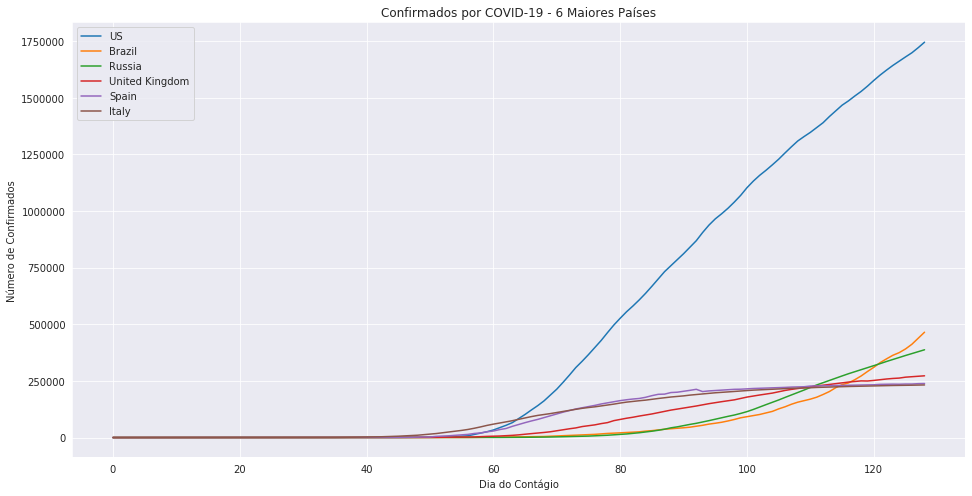

In [21]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in db_confirmed_country['5/26/20'].sort_values(ascending = False)[:n].index:
  ax.plot(range(db_confirmed_country.T.shape[0]), db_confirmed_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Confirmados')
plt.title('Confirmados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
plt.savefig('confirmedcovid.png')

In [9]:
date = db_confirmed_country.columns[db_confirmed_country.shape[1]-1]

db_confirmed_country.T['Brazil'].iplot(title = 'Casos confirmados por covid no Brasil - {}'.format(date),color='green')
plt.savefig('teste.jpg')

<Figure size 432x288 with 0 Axes>

In [13]:
pd.DataFrame(db_confirmed_country['5/29/20'].sort_values(ascending=False)[:6])

,5/29/20
Country/Region,
US,1746019
Brazil,465166
Russia,387623
United Kingdom,272607
Spain,238564
Italy,232248


## Mortes

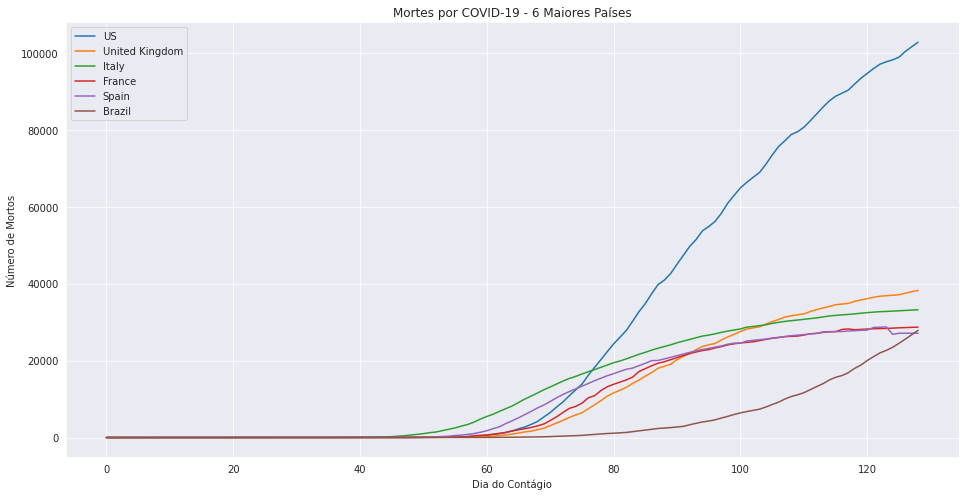

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in db_deaths_country['5/26/20'].sort_values(ascending = False)[:n].index:
  ax.plot(range(db_deaths_country.T.shape[0]), db_deaths_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Mortos')
plt.title('Mortes por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
plt.savefig('deathscovid.png')

In [14]:
pd.DataFrame(db_deaths_country['5/29/20'].sort_values(ascending=False)[:6])

,5/29/20
Country/Region,
US,102809
United Kingdom,38243
Italy,33229
France,28717
Brazil,27878
Spain,27121


In [21]:
date = db_deaths_country.columns[db_deaths_country.shape[1]-1]

db_deaths_country.T['Brazil'].iplot(title = 'Casos de mortes por covid no Brasil - {}'.format(date),color='green')

## Recuperados

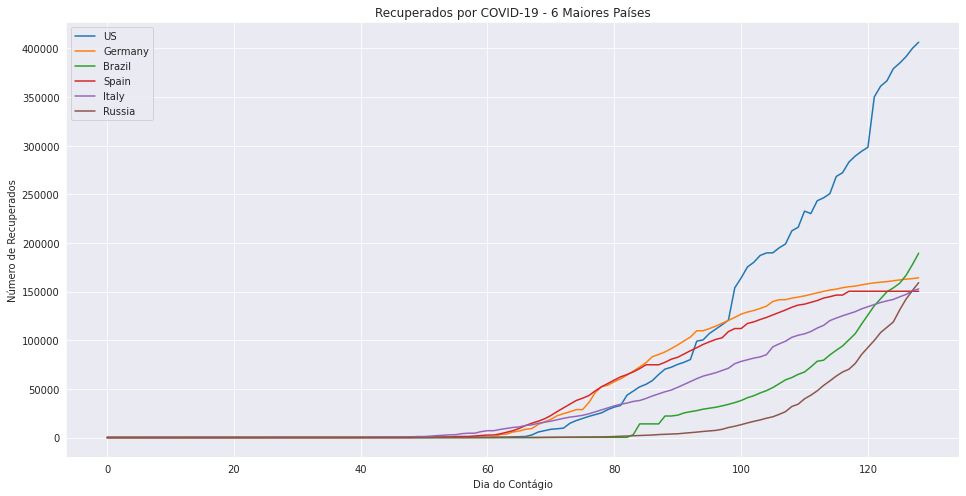

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(16,8))
n = 6
for i in db_recovered_country['5/26/20'].sort_values(ascending = False)[:n].index:
  ax.plot(range(db_recovered_country.T.shape[0]), db_recovered_country.T[i],label=i)
plt.xlabel('Dia do Contágio')
plt.ylabel('Número de Recuperados')
plt.title('Recuperados por COVID-19 - {} Maiores Países'.format(n))
plt.legend()
plt.savefig('revoredcovid.png')

In [16]:
pd.DataFrame(db_recovered_country['5/29/20'].sort_values(ascending=False)[:n])

,5/29/20
Country/Region,
US,406446
Brazil,189476
Germany,164245
Russia,159257
Italy,152844
Spain,150376


In [62]:
date = db_recovered_country.columns[db_recovered_country.shape[1]-1]

db_recovered_country.T['Brazil'].iplot(title = 'Casos recuperados por covid no Brasil - {}'.format(date),color='green')
